In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
import statsmodels.api as sm
from matplotlib import pyplot as plt

random_state = 0

## Data

In [2]:
antenna_input_df = pd.read_csv("./Data/hw1_input.csv")
antenna_real_df = pd.read_csv("./Data/hw1_real.csv")
antenna_img_df = pd.read_csv("./Data/hw1_img.csv")

antenna_mag_df = (antenna_real_df**2 + antenna_img_df**2) ** 0.5
antenna_inp_scaled_df = (antenna_input_df - antenna_input_df.mean()) / antenna_input_df.std(ddof=1)

In [3]:
antenna_input_df.mean()

length of patch                               3.569210
width of patch                                3.536983
height of patch                               0.024273
height of substrate                           0.347643
height of solder resist layer                 0.060065
radius of the probe                           0.032198
c_pad                                         0.012797
c_antipad                                     0.060648
c_probe                                       0.245586
dielectric constant of substrate              3.704384
dielectric constant of solder resist layer    3.521911
dtype: float64

In [4]:
antenna_input_df.std(ddof=1)

length of patch                               0.966173
width of patch                                1.182100
height of patch                               0.008800
height of substrate                           0.272738
height of solder resist layer                 0.023670
radius of the probe                           0.010352
c_pad                                         0.007111
c_antipad                                     0.021503
c_probe                                       0.111245
dielectric constant of substrate              0.853877
dielectric constant of solder resist layer    0.871233
dtype: float64

In [5]:
antenna_input_df.describe()

,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,3.569210,3.536983,0.024273,0.347643,0.060065,0.032198,0.012797,0.060648,0.245586,3.704384,3.521911
std,0.966173,1.182100,0.008800,0.272738,0.023670,0.010352,0.007111,0.021503,0.111245,0.853877,0.871233
min,1.805658,1.801273,0.010008,0.100321,0.020039,0.015012,0.000003,0.025292,0.050810,2.023380,2.001679
25%,2.755534,2.501163,0.016194,0.126901,0.038689,0.023389,0.006985,0.042011,0.148565,2.998152,2.783710
50%,3.637716,3.215396,0.024198,0.155254,0.060764,0.030979,0.012454,0.060532,0.245049,3.866295,3.480916
75%,4.369311,4.829731,0.031688,0.649324,0.080247,0.041819,0.019014,0.078227,0.340203,4.375551,4.278575
max,5.199919,5.198689,0.039843,0.799082,0.099728,0.049960,0.024996,0.099945,0.449599,4.999324,4.999950


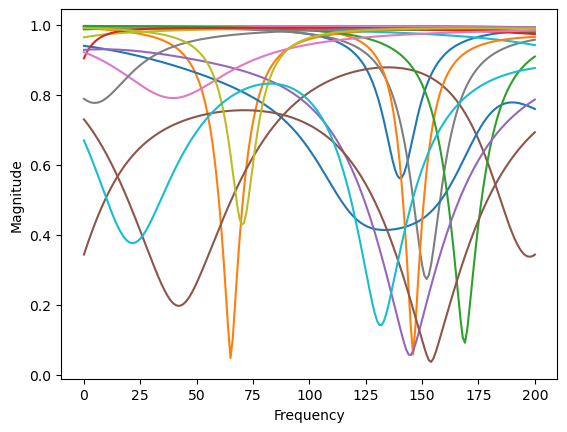

In [6]:
antenna_mag_df.sample(20).T.plot(legend=False)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

## PCA

### Q1

Can we reduce the complexity of the design space by using Principal Component
Analysis (PCA) to identify key parameters that most influence the S11 response of
the antenna?

In [7]:
z_0025 = 2.81
# To check 95% CI of design parameters compared to their mean to understand how much they go to the negative side
# With normality assumption
(antenna_input_df.mean() - z_0025*antenna_input_df.std()) / antenna_input_df.mean()

length of patch                               0.239343
width of patch                                0.060866
height of patch                              -0.018751
height of substrate                          -1.204544
height of solder resist layer                -0.107362
radius of the probe                           0.096575
c_pad                                        -0.561423
c_antipad                                     0.003711
c_probe                                      -0.272867
dielectric constant of substrate              0.352283
dielectric constant of solder resist layer    0.304876
dtype: float64

In [8]:
antenna_input_df.corr()

,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
length of patch,1.000000,-0.114174,-0.026032,-0.064344,0.044502,-0.069905,-0.005560,-0.009627,0.081735,-0.037448,-0.014496
width of patch,-0.114174,1.000000,0.091726,0.923739,-0.021056,0.035675,-0.044198,-0.013358,0.029999,0.442193,0.038746
height of patch,-0.026032,0.091726,1.000000,0.082833,0.036045,0.030689,0.002422,0.037583,0.031592,-0.044318,-0.037769
height of substrate,-0.064344,0.923739,0.082833,1.000000,-0.011870,0.017410,-0.031571,-0.009432,0.044166,0.459847,0.002421
height of solder resist layer,0.044502,-0.021056,0.036045,-0.011870,1.000000,-0.012756,-0.018044,-0.017071,0.024842,-0.010967,-0.038405
radius of the probe,-0.069905,0.035675,0.030689,0.017410,-0.012756,1.000000,0.002906,-0.000523,0.048088,-0.025728,0.007524
c_pad,-0.005560,-0.044198,0.002422,-0.031571,-0.018044,0.002906,1.000000,0.067678,-0.015500,-0.049318,0.015284
c_antipad,-0.009627,-0.013358,0.037583,-0.009432,-0.017071,-0.000523,0.067678,1.000000,-0.132321,-0.016741,0.067821
c_probe,0.081735,0.029999,0.031592,0.044166,0.024842,0.048088,-0.015500,-0.132321,1.000000,0.015640,-0.029101
dielectric constant of substrate,-0.037448,0.442193,-0.044318,0.459847,-0.010967,-0.025728,-0.049318,-0.016741,0.015640,1.000000,0.060402


Yes, we can apply PCA to select less number of components (less complexity) that explain most of the variance of the design space, therefore most of the information in the input space. 2 Assumptions of the PCA, however, does not strictly hold with this input space. All parameters must be positive (and some are not much higher than 0 considered their std as can be seen above, such as height of substrate and c_pad). We apply standardization before PCA but standardizing such values is problematic itself, however this preprocessing step is helpful for this assumption. Also there are many design parameters that have almost no linear relation to other parameters, such as radius of the probe and c_probe. Therefore, the performance of the PCA can be problematic and should be assessed.

### Q2

How much of the total variance in the design parameter space can be explained by
the principal components?

In [9]:
# PCA on Input Space
pca_model = PCA()
pca_coord_arr = pca_model.fit_transform(antenna_inp_scaled_df)

In [10]:
# Create dataframe for components
pca_component_df = pd.DataFrame(
    data={"explained_variance": pca_model.explained_variance_ratio_},
    index=range(1, antenna_input_df.shape[1] + 1),
)
pca_component_df["cumulative_variance"] = pca_component_df[
    "explained_variance"
].cumsum()
# Add coefficients of original features for PCA indexes
input_cols = antenna_input_df.columns
pca_component_df[input_cols] = pca_model.components_

In [11]:
pca_component_df

,explained_variance,cumulative_variance,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
1,0.207153,0.207153,-0.101327,0.624178,0.071054,0.624137,-0.021049,0.025997,-0.054228,-0.018720,0.039213,0.445100,0.038422
2,0.110708,0.317862,0.315409,-0.009718,0.055716,0.018824,0.266259,0.002815,-0.265990,-0.559499,0.564753,-0.012829,-0.350944
3,0.100034,0.417896,-0.369645,0.040766,0.620460,0.016441,0.086417,0.548381,0.144827,0.088323,0.093131,-0.256167,-0.255339
4,0.096072,0.513968,0.376883,0.039631,0.392974,0.076518,0.510652,-0.454397,0.177533,0.373926,-0.151004,-0.022492,-0.184975
5,0.091871,0.605839,0.409833,0.012169,0.017701,0.028012,-0.124629,0.218986,0.580059,0.127759,0.487544,0.012254,0.420314
6,0.088458,0.694297,0.073314,-0.032326,0.069714,-0.060565,0.459841,0.304908,-0.547579,0.172140,0.016285,0.027772,0.591708
7,0.085659,0.779956,-0.253331,0.000413,-0.490098,0.002837,0.647199,0.212779,0.429976,-0.138146,-0.102528,0.097290,-0.086813
8,0.081651,0.861607,0.454266,0.022090,-0.317943,0.059481,-0.110408,0.491478,-0.174386,0.415883,-0.129279,0.053226,-0.460296
9,0.073399,0.935005,-0.406238,-0.040157,-0.216559,-0.038186,0.040184,-0.240280,-0.140321,0.548589,0.618694,0.031927,-0.145645
10,0.058303,0.993308,-0.036934,-0.328516,0.243013,-0.305362,-0.027430,0.080764,0.049041,-0.000574,0.000912,0.849121,-0.087887


Keeping first 10 components seems reasonable since they explain 99.33% of the total variance while having similar explained variances, and the last one explains very little variance compared to others. By this, however, the complexity of the design space is not much lowered.

### Q3

What insights can we draw from the PCA regarding the relationship between
geometry and electromagnetic behavior?

We can analyze PCA components to find different design space patterns and check if these patterns allign with electromagnetics, first two component will be analyzed as an example:

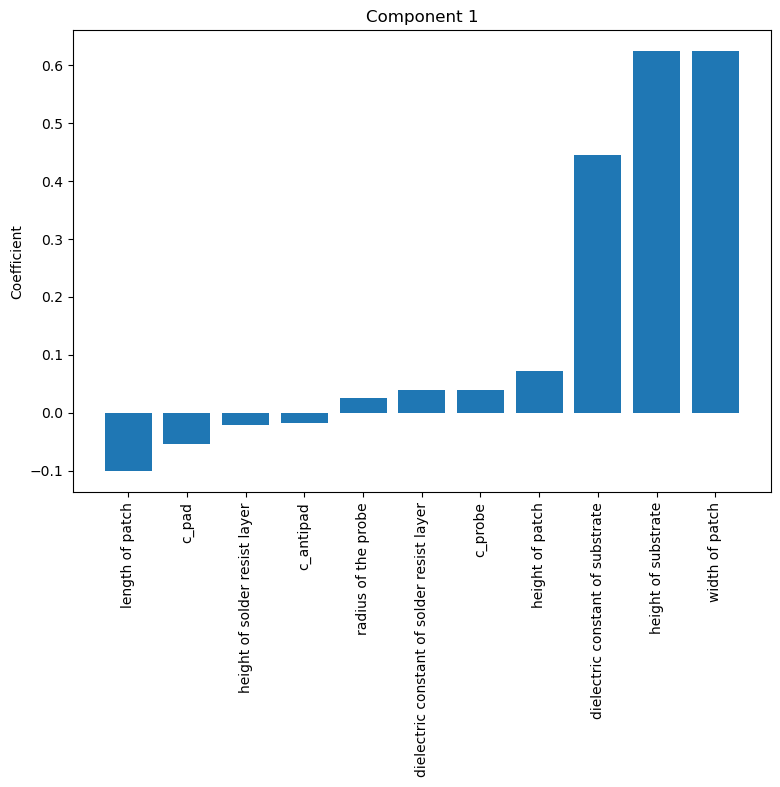

In [12]:
i = 1
comp_sorted_ser = pca_component_df.loc[i, input_cols].sort_values()
    
plt.figure(figsize=(9, 6))
plt.bar(comp_sorted_ser.index, comp_sorted_ser.values)
plt.title(f'Component {i}')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)
plt.show()

This component models the interaction of substrate parameters with the width of the patch. This might be an index which models how dense (over lenght) total dielectric constant of subsrate , and mean that total density (over lenght) of dielectric constant of substrate is highly informative to model electro-magnetic behaviours of this type of antennas. However, it is hard to make certain interpretations since they require more field knowledge.

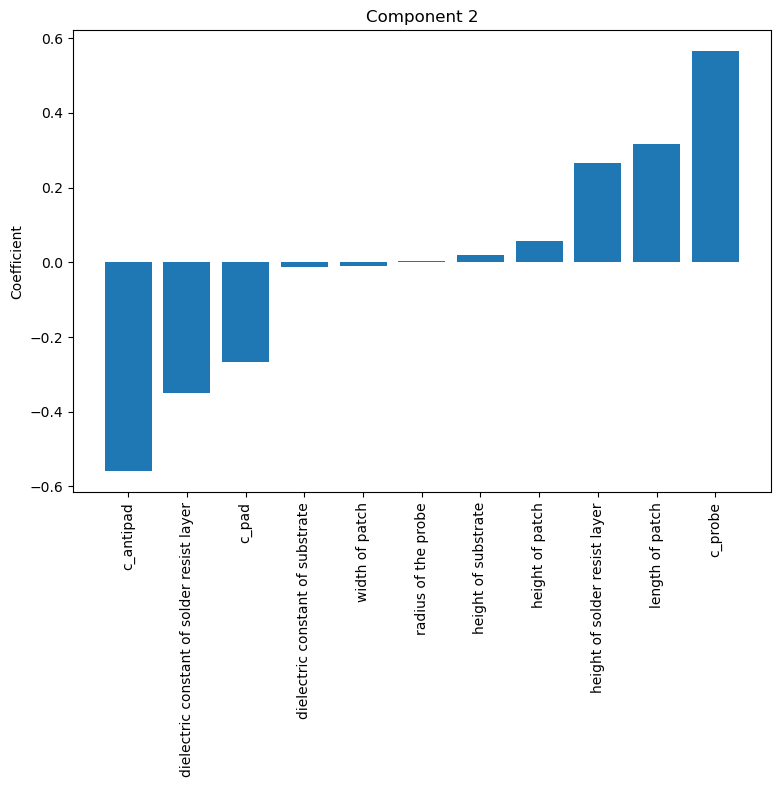

In [13]:
i = 2
comp_sorted_ser = pca_component_df.loc[i, input_cols].sort_values()
    
plt.figure(figsize=(9, 6))
plt.bar(comp_sorted_ser.index, comp_sorted_ser.values)
plt.title(f'Component {i}')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)
plt.show()

This index mainly models interactions between antipad, pad and probe which are certain length parameters of closeby objects in the specific antenna design. If antipad and pad is small while probe is large, that means the distance between these object is small, otherwise it is large. This component mainly models this distance but also have some other effects from different design parameters. This distance might have an effect on S11 since it explains high amount of information in the input space.

## Linear Regression

### Q1

Given that S11 parameters are evaluated at 201 frequency points, predicting them
simultaneously through multitarget regression may be computationally intensive
and beyond the scope of the content covered so far. Instead, can we simplify the
regression task by focusing on predicting S11 at a few key frequency points? For
instance, selecting frequencies of interest where the behavior is most critical (e.g.,
resonance frequencies) can reduce the complexity of the task.

Yes, focusing on frequencies of interest one by one can make this problem much easier for Linear Regression models, and since they can be trained very fast, this method is not that computationally expensive. For example, if we want an antenna to resonance (magnitude <= 0.3) between (100, 125) frequencies, we can predict each one of them seperately and see whether all predictions are below 0.3 or not.

### Q2

How effective are linear regression models in predicting the real and imaginary
components of S11 at these selected frequency points, based on the geometric
parameters of the antenna design?

In [14]:
# k-fold CV on specific frequencies, to assess the effectiveness of LR models
def lr_cv_freq(
    X_inp: pd.DataFrame,
    y_inp: pd.DataFrame,
    y_freq: list,
    k_cv: int = 10,
    random_state: int = random_state,
):
    """Create LR models to predict specified frequency points, k-fold test"""
    assert len(X_inp) == len(y_inp), "Data shapes do not match"
    kfold = KFold(n_splits=k_cv, random_state=random_state, shuffle=True)
    lr_freq_cv_mae = [None] * len(y_freq)
    lr_freq_cv_wmape = [None] * len(y_freq)
    freq_lr_models = [None] * len(y_freq)
    X = sm.add_constant(X_inp)
    y = y_inp.copy()
    y.columns = y.columns.astype(int)

    # For each input frequency
    for i, freq in enumerate(y_freq):
        freq_cv_mae = [None] * k_cv
        freq_cv_wmape = [None] * k_cv
        freq_cv_lr = [None] * k_cv
        # For every cross validation set
        for k, (tr_idx, test_idx) in enumerate(kfold.split(X)):
            # Split data
            X_test = X.iloc[test_idx]
            X_train = X.iloc[tr_idx]
            y_test = y.iloc[test_idx][freq]
            y_train = y.iloc[tr_idx][freq]

            # Train & evaluate LR on the subset
            iter_lr = sm.OLS(y_train, X_train).fit()
            iter_lr_pred = iter_lr.predict(X_test)
            iter_err = y_test - iter_lr_pred
            iter_mae = iter_err.abs().mean()
            iter_wmape = iter_err.abs().sum() / y_test.abs().sum()
            # Record test metrics & iteration model
            freq_cv_mae[k] = iter_mae
            freq_cv_wmape[k] = iter_wmape
            freq_cv_lr[k] = iter_lr

        # Record frequency test metrics and models
        freq_mean_mae = np.mean(freq_cv_mae)
        lr_freq_cv_mae[i] = freq_mean_mae
        freq_mean_wmape = np.mean(freq_cv_wmape)
        lr_freq_cv_wmape[i] = freq_mean_wmape
        freq_lr_models[i] = freq_cv_lr

    return lr_freq_cv_mae, lr_freq_cv_wmape, freq_lr_models

In [15]:
# Work with standardized input data to be able to interpret coefficients
mag_lr_freq_mae, mag_lr_freq_wmape, freq_lr_mag_models = lr_cv_freq(
    antenna_inp_scaled_df, antenna_mag_df, np.arange(stop=antenna_mag_df.shape[1]), k_cv=30 # For ~normality
)
real_lr_freq_mae, real_lr_freq_wmape, freq_lr_real_models = lr_cv_freq(
    antenna_inp_scaled_df, antenna_real_df, np.arange(stop=antenna_mag_df.shape[1]), k_cv=30 # For ~normality
)
img_lr_freq_mae, img_lr_freq_wmape, freq_lr_img_models = lr_cv_freq(
    antenna_inp_scaled_df, antenna_img_df, np.arange(stop=antenna_mag_df.shape[1]), k_cv=30 # For ~normality
)

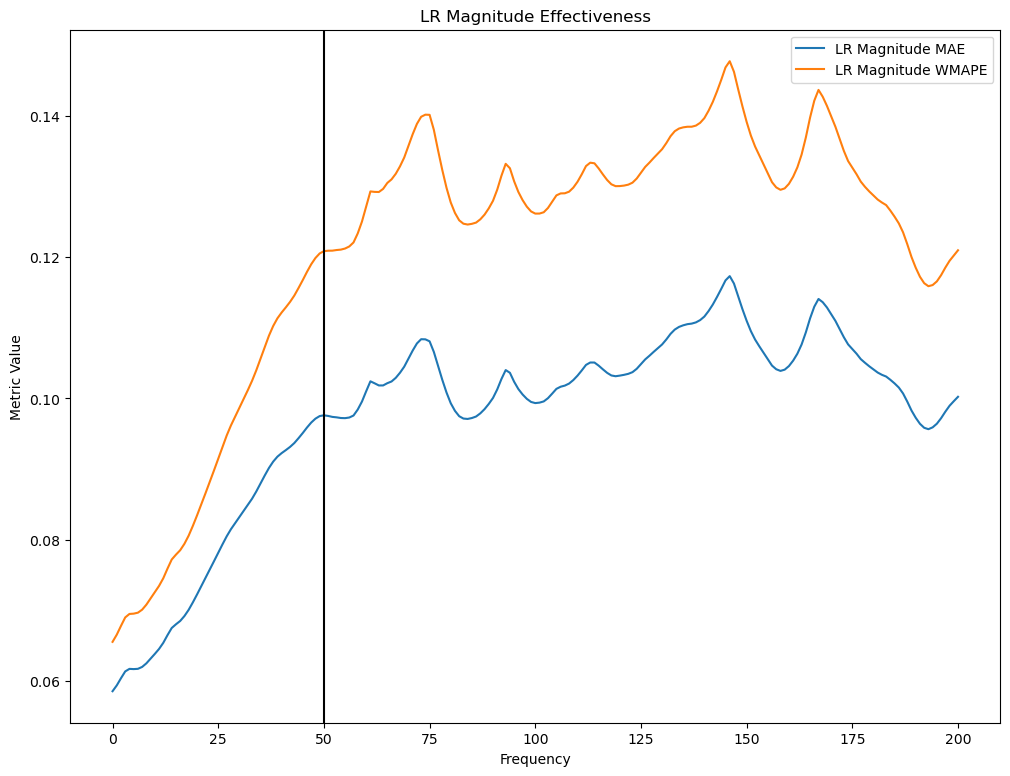

In [16]:
plt.figure(figsize=(12, 9))
plt.plot(mag_lr_freq_mae, label='LR Magnitude MAE')
plt.plot(mag_lr_freq_wmape, label='LR Magnitude WMAPE')
plt.axvline(50, color='black')
plt.title('LR Magnitude Effectiveness')
plt.xlabel('Frequency')
plt.ylabel('Metric Value')
plt.legend()

Prediction of magnitude problem gets harder for LR models from frequency 0 to 50, then it is more stable as can be seen in errors. This can be expected since many outputs start with high values (around 0.7-1) and then there can be different patterns in later frequencies such as resonance which makes the problem harder to model.

In [17]:
lr_mag_perf_df = pd.DataFrame(data={'LR_mag_MAE': mag_lr_freq_mae, 'LR_mag_WMAPE': mag_lr_freq_wmape})
lr_mag_perf_df.describe()

,LR_mag_MAE,LR_mag_WMAPE
count,201.000000,201.000000
mean,0.097578,0.121176
std,0.013834,0.020151
min,0.058505,0.065500
25%,0.096406,0.117244
50%,0.101821,0.128767
75%,0.105572,0.133251
max,0.117338,0.147793


In [18]:
lr_mag_perf_df.loc[50:].describe()

,LR_mag_MAE,LR_mag_WMAPE
count,151.000000,151.000000
mean,0.104168,0.130966
std,0.005140,0.006995
min,0.095643,0.115906
25%,0.100053,0.126564
50%,0.103643,0.130582
75%,0.107648,0.135515
max,0.117338,0.147793


Error rates seems alright and actually better than I expected since I think this problem is highly non-linear. Standard deviation of test error is much lower when calculated after frequency 50 which supports the claim above. For detecting resonances, however, this error rate can be high since we are interested in values below 0.3, 0.1 is the third of the interval of interest.

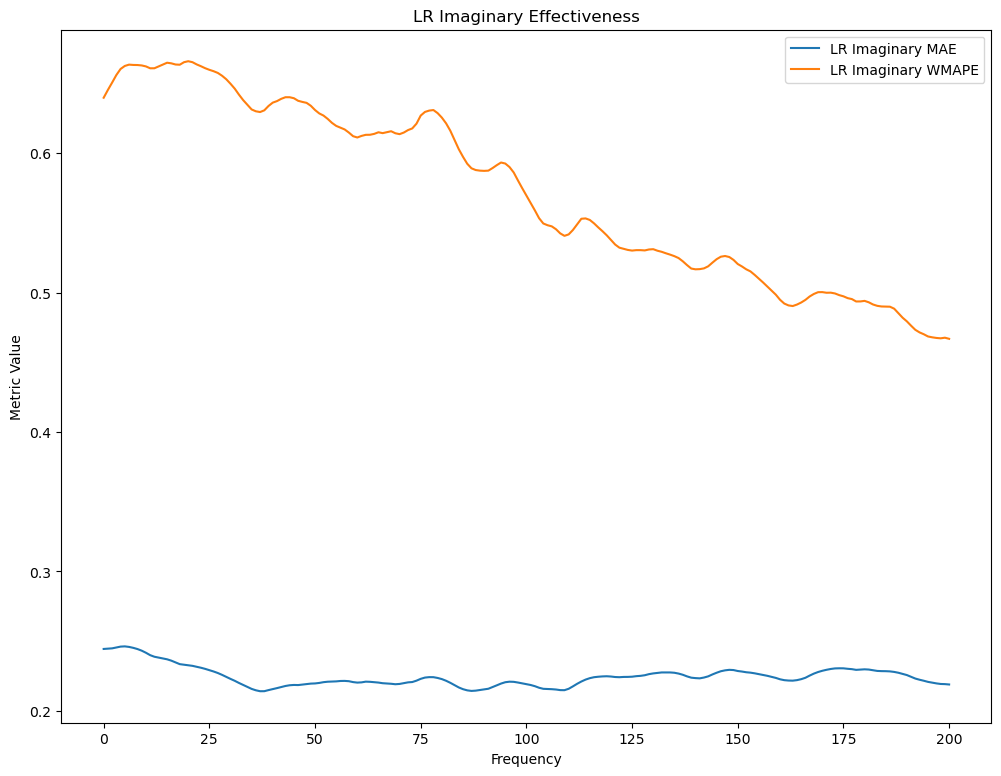

In [19]:
plt.figure(figsize=(12, 9))
plt.plot(img_lr_freq_mae, label='LR Imaginary MAE')
plt.plot(img_lr_freq_wmape, label='LR Imaginary WMAPE')
plt.title('LR Imaginary Effectiveness')
plt.xlabel('Frequency')
plt.ylabel('Metric Value')
plt.legend()

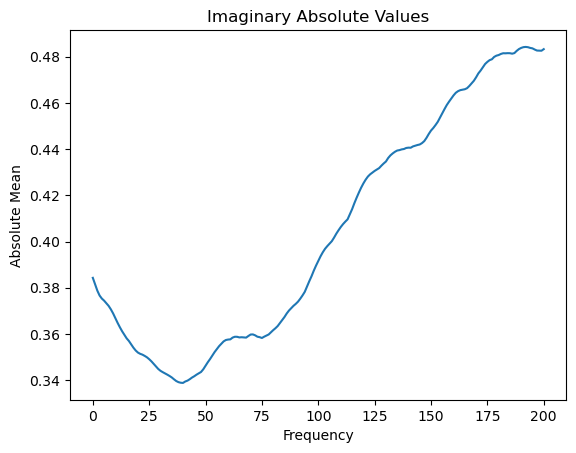

In [20]:
plt.plot(antenna_img_df.abs().mean().values)
plt.title('Imaginary Absolute Values')
plt.xlabel('Frequency')
plt.ylabel('Absolute Mean')
plt.show()

In [21]:
lr_img_perf_df = pd.DataFrame(data={'LR_img_MAE': img_lr_freq_mae, 'LR_img_WMAPE': img_lr_freq_wmape})
lr_img_perf_df.describe()

,LR_img_MAE,LR_img_WMAPE
count,201.000000,201.000000
mean,0.224512,0.571825
std,0.007183,0.063768
min,0.214019,0.466921
25%,0.219632,0.516926
50%,0.223574,0.569786
75%,0.227870,0.630698
max,0.246201,0.666128


Modelling imaginary part of S11 is harder than the magnitude. MAE rates are stable over all frequencies, however, their mean is higher than twice of mean MAE when predicting magnitudes. Also imaginary values tend to get larger as frequency levels increase, resulting in downtrend of WMAPE. However, imaginary WMAPE is much more higher than magnitude WMAPE, four to five times.

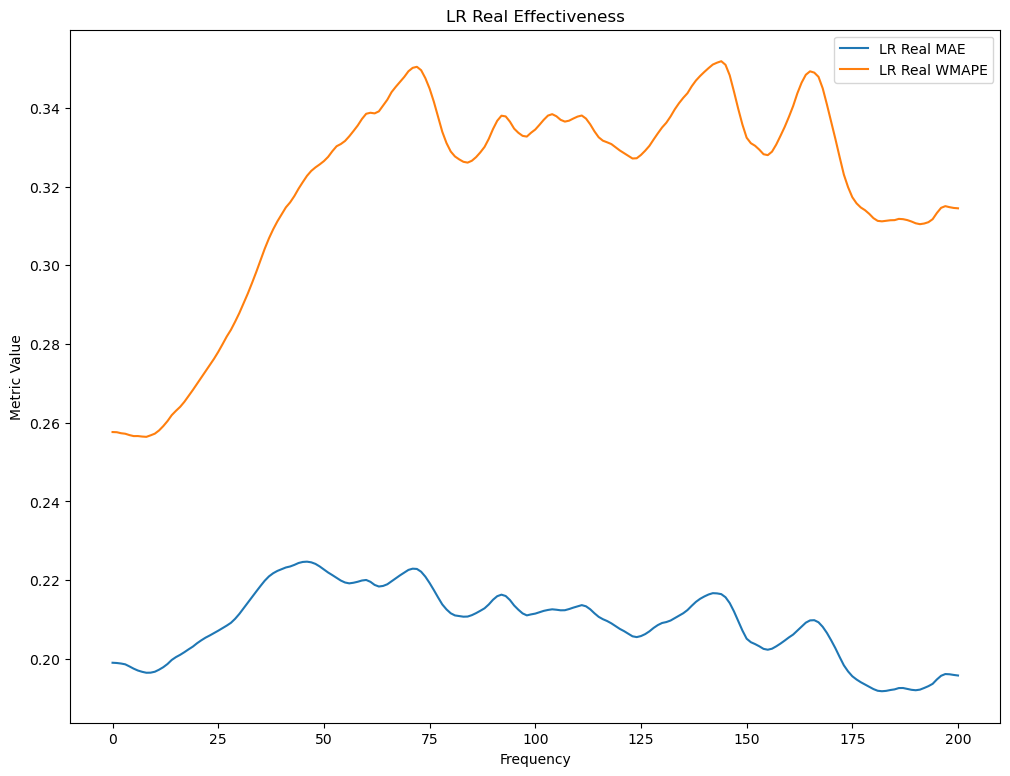

In [22]:
plt.figure(figsize=(12, 9))
plt.plot(real_lr_freq_mae, label='LR Real MAE')
plt.plot(real_lr_freq_wmape, label='LR Real WMAPE')
plt.title('LR Real Effectiveness')
plt.xlabel('Frequency')
plt.ylabel('Metric Value')
plt.legend()

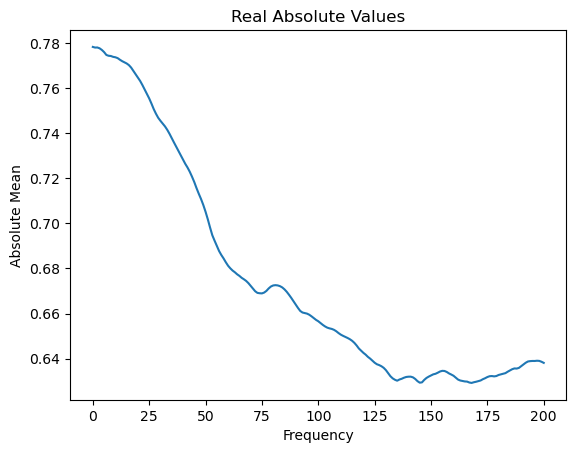

In [23]:
plt.plot(antenna_real_df.abs().mean().values)
plt.title('Real Absolute Values')
plt.xlabel('Frequency')
plt.ylabel('Absolute Mean')
plt.show()

In [24]:
lr_real_perf_df = pd.DataFrame(data={'LR_real_MAE': real_lr_freq_mae, 'LR_real_WMAPE': real_lr_freq_wmape})
lr_real_perf_df.describe()

,LR_real_MAE,LR_real_WMAPE
count,201.000000,201.000000
mean,0.209029,0.320328
std,0.009235,0.026421
min,0.191770,0.256409
25%,0.202573,0.311492
50%,0.210354,0.329388
75%,0.215855,0.337789
max,0.224691,0.351859


Modelling real part of S11 is also harder than the magnitude. MAE rates are stable over all frequencies and close to imaginary MAE, however, their mean is around twice of mean MAE when predicting magnitudes. Also real values tend to get lower (reverse of imaginary part) as frequency levels increase, resulting in uptrend of WMAPE up to frequency 75. Real part has lower WMAPE scores than imaginary part, this can be expected since their mean error rates are around same range while real values have higher absolute values as can be seen in graphs.

### Q3

What patterns emerge when linear regression is applied to individual frequency
points, and do these patterns suggest any broader trends in the design space?

In [25]:
def parse_cv_models(freq_cv_models):
    '''Get mean coefficients & p-values of design parameters to predict specific frequencies'''
    freq_mean_coef = [None] * len(freq_cv_models)
    freq_mean_pval = [None] * len(freq_cv_models)
    for i, cv_models in enumerate(freq_cv_models):
        cv_coef_arr = [cv_lr.params.iloc[1:] for cv_lr in cv_models]
        cv_coef_arr = np.mean(cv_coef_arr, axis=0)
        freq_mean_coef[i] = cv_coef_arr

        cv_pval_arr = [cv_lr.pvalues.iloc[1:] for cv_lr in cv_models]
        cv_pval_arr = np.mean(cv_pval_arr, axis=0)
        freq_mean_pval[i] = cv_pval_arr

    freq_coef_df = pd.DataFrame(freq_mean_coef, columns=input_cols)
    freq_pval_df = pd.DataFrame(freq_mean_pval, columns=input_cols)

    return freq_coef_df, freq_pval_df

In [26]:
# Because magnitude is easier for LR models, their coefficients and estimations are more reliable.
# Therefore, this question will be analyzed on S11 magnitudes
freq_mag_coef_df, freq_mag_pval_df = parse_cv_models(freq_lr_mag_models)

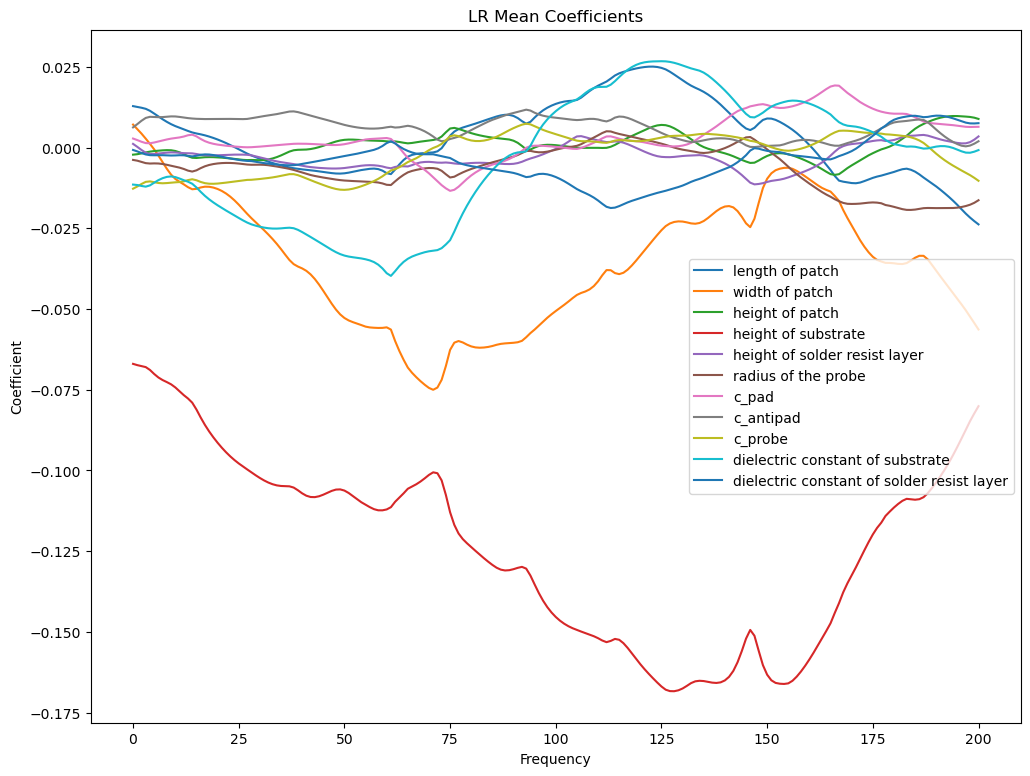

In [27]:
plt.figure(figsize=(12, 9))
for param in freq_mag_coef_df.columns:
    plt.plot(freq_mag_coef_df[param], label=param)
plt.title('LR Mean Coefficients')
plt.xlabel('Frequency')
plt.ylabel('Coefficient')
plt.legend()
plt.show()

Many parameters' coefficients are very close to 0, design parameters which affect LR predictions most are height of substrate, width of patch, length of patch and dielectric constant of substrate. I think LR models find levels for S11 frequencies and then decrease (generally) these magnitude levels based on these features.

In [28]:
# Check features which are generally informative on frequency space
freq_mag_pval_df.describe()

,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
count,201.000000,201.000000,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.308732,0.208599,0.675095,1.405492e-06,0.619611,0.417266,0.548217,0.435232,0.502240,0.224390,0.489983
std,0.247486,0.243702,0.187127,9.397469e-06,0.179215,0.298384,0.299403,0.276216,0.293034,0.313815,0.262599
min,0.001792,0.000295,0.187933,4.074612e-14,0.219263,0.012295,0.033999,0.067693,0.016280,0.000004,0.022541
25%,0.069257,0.007826,0.567073,3.253084e-12,0.495488,0.152098,0.238530,0.187508,0.180182,0.002119,0.266753
50%,0.294109,0.095073,0.726518,8.918914e-09,0.664744,0.377065,0.650993,0.363275,0.603674,0.056256,0.510373
75%,0.434376,0.371805,0.824971,1.331419e-07,0.765991,0.717025,0.843201,0.744544,0.761488,0.331217,0.708149
max,0.899663,0.905267,0.912893,1.112727e-04,0.889891,0.910159,0.894476,0.896126,0.910274,0.910131,0.884415


height of substrate feature definetly is very informative over all frequency levels for LR models since maximum mean p-value observed is much smaller than 0.001. Some of the other design parameters are effective on some frequency levels since their mins and 25% quantiles are low.

In [29]:
# Check which features are potentially informative over frequency space
lower_pval_bound = freq_mag_pval_df.mean() - 1.5*freq_mag_pval_df.std()
selected_inp_params = lower_pval_bound[lower_pval_bound < 0.001].sort_values()
selected_inp_params

dielectric constant of substrate   -0.246333
width of patch                     -0.156954
length of patch                    -0.062496
radius of the probe                -0.030310
height of substrate                -0.000013
dtype: float64

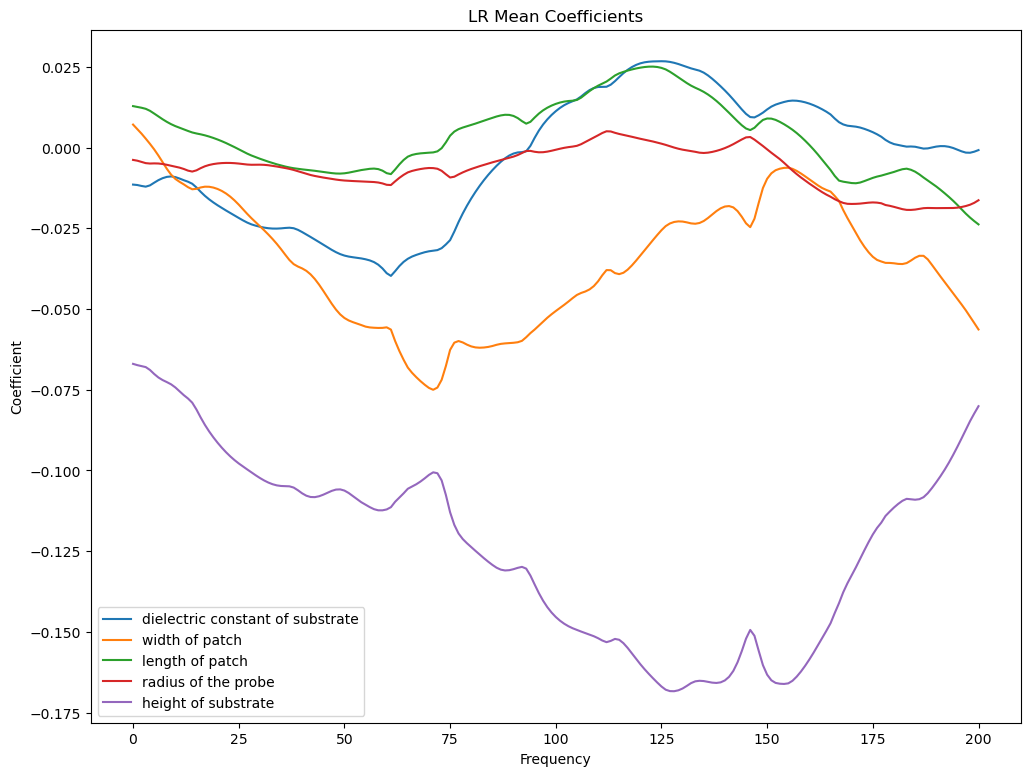

In [30]:
plt.figure(figsize=(12, 9))
for param in selected_inp_params.index:
    plt.plot(freq_mag_coef_df[param], label=param)
plt.title('LR Mean Coefficients')
plt.xlabel('Frequency')
plt.ylabel('Coefficient')
plt.legend()
plt.show()

These 5 parameters are selected to interpret patterns in the design space, radius of the probe is added to the set as well since it has relatively high effect after some frequency level. Increasing the height of substrate decreases the magnitude (which is what we after for resonance behaviour) over all frequency levels and highest effects are around (125, 155). Width of patch and dielectric constant of substrate parameters have similar coefficient curves, starting from almost having no effect to have decent inverse effect on the magnitude around (50, 75). After this, dielectric constant of substrate starts to have direct effect while width of patch's effect remains inverse. Radius of the probe parameter usually does not have high effect on the magnitude prediction, however, after around frequency 160, it has inverse effect.

## Model Performance & Interpretability

### Q1

How do PCA and regression models compare in terms of their ability to simplify
and predict the antenna's performance?

PCA models simplify input space by projecting observed points into new dimensions with highest variance and we can drop new dimensions with lowest explained variances to reduce complexity. They do not have any predictive ability, but they can model different patterns in the input space with their new dimensions (indexes).

Linear Regression models, on the other hand, predict antenna's certain electro-magnetic behaviours (such as S11) and is not used to simplify input spaces. They can be seen as simplification of the problem, since at the end, they generate a linear formula which is an approximation (simplification) of the original problem.

### Q2

What are the potential limitations of these models, and how could they be improved
to more accurately represent complex, nonlinear electromagnetic behavior?

PCA models assume input variables to have linear relation between themselves and that they are normally distributed. Both these assumptions are problematic in this case. First, many input parameters that have no linear relation to other design parameters. And also these parameters are stricly positive, so not normally distributed (we apply strandardization so it lessens this problem, however, applying standardization to such data is problematic itself.)

Linear Regression models assume linear relations between design parameters and outputs, which does not hold for this problem because of non-linear effect of design parameters to electromagnetic behaviour of antennas. Other assumptions of Linear Regression are also problematic such as normality of residuals (since magnitude values are between 0-1 and others are between -1-1), multicollinearity (since input parameters are physical design parameters, there are high correlation between some of them). I think that test results reflect these problems as they are not that good.

For both models, linearity problem can be solved by adding transformed design parameters to the input space, for example second degree polynomial terms of the current design parameters. By doing this, we can enable both type of models to account for these new non-linear variables in a linear way. For linear regression models, increaasing sample size and penalization might be needed because there would be high number of features.